<a href="https://colab.research.google.com/github/MatteoAldovardi92/Taxi_Project/blob/main/TaxiDriverClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mnavas/taxi-routes-for-mexico-city-and-quito")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/taxi-routes-for-mexico-city-and-quito


In [78]:
import os

# Show files inside the dataset directory
print("Dataset contents:")
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))


Dataset contents:
/kaggle/input/taxi-routes-for-mexico-city-and-quito/mex_clean.csv
/kaggle/input/taxi-routes-for-mexico-city-and-quito/uio_clean.csv
/kaggle/input/taxi-routes-for-mexico-city-and-quito/all-data_clean.csv
/kaggle/input/taxi-routes-for-mexico-city-and-quito/bog_clean.csv


In [79]:
import pandas as pd
import kagglehub
import os

# Download the dataset
path = kagglehub.dataset_download("mnavas/taxi-routes-for-mexico-city-and-quito")

# Load each CSV as a separate DataFrame
bog_df = pd.read_csv(os.path.join(path, "bog_clean.csv"))
uio_df = pd.read_csv(os.path.join(path, "uio_clean.csv"))
mex_df = pd.read_csv(os.path.join(path, "mex_clean.csv"))
all_df = pd.read_csv(os.path.join(path, "all-data_clean.csv"))

# Preview one
print(all_df.head())


   id              vendor_id      pickup_datetime     dropoff_datetime  \
0   1                  Quito  2016-09-17 09:32:06  2016-09-17 10:05:51   
1   2  Guadalajara Easy Taxi  2016-09-17 09:59:54  2016-09-17 10:06:23   
2   3              Monterrey  2016-09-17 10:06:52  2016-09-17 10:09:40   
3   4              Monterrey  2016-09-17 09:45:56  2016-09-17 10:13:34   
4   5              Monterrey  2016-09-17 10:12:00  2016-09-17 10:16:31   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0          0.632055         0.528947         -78.549447         -0.361363   
1          0.327804         0.391950        -103.366600         20.686971   
2          0.140910         0.563280        -100.165737         25.619387   
3          0.207565         0.590416        -100.491721         25.676294   
4          0.128881         0.580419        -100.104166         25.643862   

  store_and_fwd_flag  trip_duration  dist_meters  wait_sec  
0                  N           

In [80]:
df = all_df

In [81]:
df.columns

pickup_locations = [(lat, lon) for lat, lon in zip(df['pickup_latitude'], df['pickup_longitude']) ]




In [14]:
# The cities in the dataset seem to be three thus I will try to run a k-mean clustering with k = 3

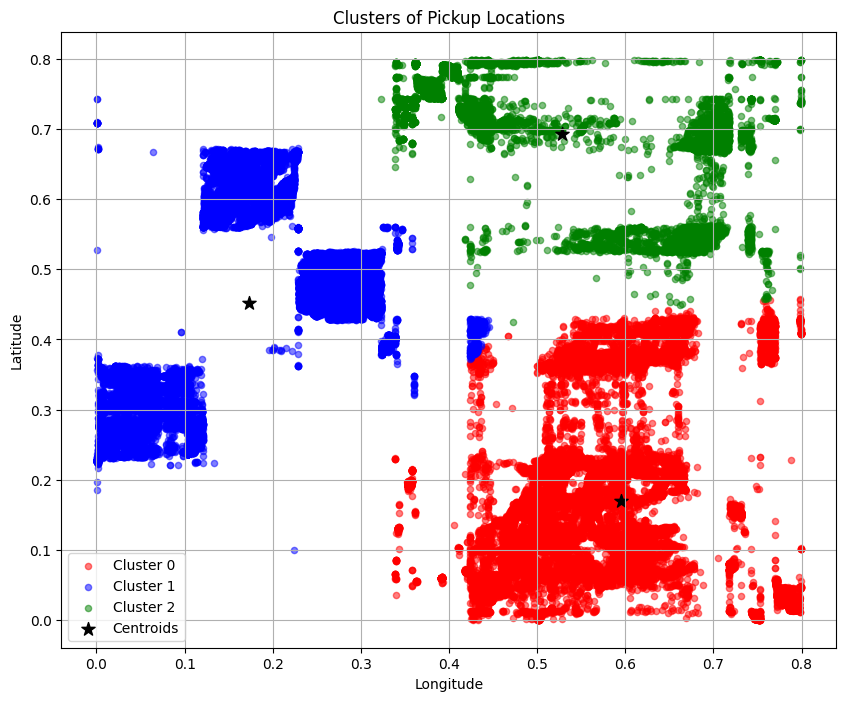

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


# Extract pickup locations
pickup_locations = [(lat, lon) for lat, lon in zip(df['pickup_latitude'], df['pickup_longitude'])]
pickup_locations = np.array(pickup_locations) # convert to numpy array for the algorithm

# Apply KMeans clustering
number_of_clusters = 3  # You can adjust this as needed
kmeans1 = KMeans(n_clusters=number_of_clusters, random_state=0)
kmeans1.fit(pickup_locations)

# Get cluster labels and centroids
pickup_labels = kmeans1.labels_
centroids1 = kmeans1.cluster_centers_

# Create a pandas DataFrame from the pickup locations, labels and centroids
df_plot1 = pd.DataFrame(pickup_locations, columns=['pickup_latitude', 'pickup_longitude'])
df_plot1['cluster'] = pickup_labels

# Create a basic scatter plot
plt.figure(figsize=(10, 8))

# Define colors for the clusters.  Ensure you have enough colors for the number of clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'gray']  # Add more if needed

# Plot the pickup points, colored by cluster.  Handle the case where there are more clusters than colors.
for i in range(len(centroids1)):
    cluster_points1 = df_plot1[df_plot1['cluster'] == i]  # Get points for this cluster
    if i < len(colors):
        plt.scatter(cluster_points1['pickup_longitude'], cluster_points1['pickup_latitude'], color=colors[i], label=f'Cluster {i}', s=20, alpha=0.5)
    else:
        plt.scatter(cluster_points1['pickup_longitude'], cluster_points1['pickup_latitude'], color='gray', label=f'Cluster {i}', s=20, alpha=0.5) # Color points gray if there are not enough colors

# Plot the centroids
plt.scatter(np.array(centroids1)[:, 1], np.array(centroids1)[:, 0], color='black', marker='*', s=100, label='Centroids')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Pickup Locations')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
kmeans1.inertia_


2596.307326619315

# Dropoff locations

In [84]:
dropoff_locations = [(lat, lon) for lat, lon in zip(df['dropoff_latitude'], df['dropoff_longitude']) ]



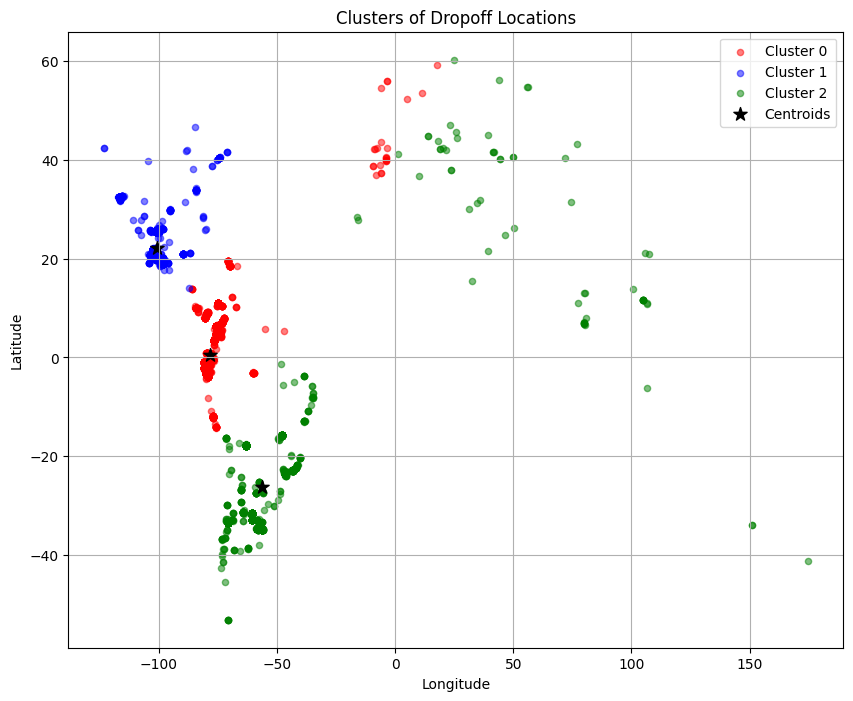

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans



# Extract dropoff locations
dropoff_locations = [(lat, lon) for lat, lon in zip(df['dropoff_latitude'], df['dropoff_longitude'])]
dropoff_locations = np.array(dropoff_locations) # convert to numpy array for the algorithm

# Apply KMeans clustering
number_of_clusters = 3  # You can adjust this as needed
kmeans2 = KMeans(n_clusters=number_of_clusters, random_state=0)
kmeans2.fit(dropoff_locations)

# Get cluster labels and centroids
dropoff_labels = kmeans2.labels_
centroids2 = kmeans2.cluster_centers_

# Create a pandas DataFrame from the dropoff locations, labels and centroids
df_plot2 = pd.DataFrame(dropoff_locations, columns=['dropoff_latitude', 'dropoff_longitude'])
df_plot2['cluster'] = dropoff_labels
# Create a basic scatter plot
plt.figure(figsize=(10, 8))

# Define colors for the clusters.  Ensure you have enough colors for the number of clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'gray']  # Add more if needed

# Plot the dropoff points, colored by cluster.  Handle the case where there are more clusters than colors.
for i in range(len(centroids2)):
    cluster_points2 = df_plot2[df_plot2['cluster'] == i]  # Get points for this cluster
    if i < len(colors):
        plt.scatter(cluster_points2['dropoff_longitude'], cluster_points2['dropoff_latitude'], color=colors[i], label=f'Cluster {i}', s=20, alpha=0.5)
    else:
        plt.scatter(cluster_points2['dropoff_longitude'], cluster_points2['dropoff_latitude'], color='gray', label=f'Cluster {i}', s=20, alpha=0.5) # Color points gray if there are not enough colors

# Plot the centroids
plt.scatter(np.array(centroids2)[:, 1], np.array(centroids2)[:, 0], color='black', marker='*', s=100, label='Centroids')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Dropoff Locations')
plt.legend()
plt.grid(True)
plt.show()


In [86]:
kmeans2.inertia_

2597274.9926640918

# Filtering and feature engineering:


I expect the mean velocity to be a decisive feature for accurate predictions. In fact, it almost feels like cheating to use it—after all, to predict trip duration, the model could simply invert the formula
$$
v_m = \frac{dist}{trip_{duration}}
$$

If, even with this feature, the model fails to produce a reliable regression, then it’s clear that some crucial aspect is missing.

In your presentation, you can humorously say that, by some miracle, you obtained the mean velocities for each trip—but not the trip durations!

#### The pickup coordinates are "normalized" between 0 to 0.8, following there's an attempt to take the pickup coordinates to their original ranges so that I can filter them better.





In [92]:
def inverse_normalize(value, min_val, max_val):
    return value * (max_val - min_val) + min_val

def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)


In [98]:
df = all_df

In [108]:
# Example: suppose these are normalized values
df['pickup_longitude_original'] = inverse_normalize(df['pickup_longitude'], -100, -75)
df['pickup_latitude_original'] = inverse_normalize(df['pickup_latitude'], -5, 25)

# If you want to normalize dropoff coordinates in the same way:
df['dropoff_longitude_norm'] = normalize(df['dropoff_longitude'], -100, -75)
df['dropoff_latitude_norm'] = normalize(df['dropoff_latitude'], -5, 25)

<ipython-input-108-8da2699f78cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_longitude_original'] = inverse_normalize(df['pickup_longitude'], -100, -75)
<ipython-input-108-8da2699f78cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_latitude_original'] = inverse_normalize(df['pickup_latitude'], -5, 25)
<ipython-input-108-8da2699f78cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

# Filter the pickup_locations and dropoff_location

In [109]:
import numpy as np


original_data_size = df.shape[0]
# creat new feature avg_speed
df['avg_speed'] = df['dist_meters'] / df['trip_duration']  # m/sec
df['avg_speed'] = 3.6*df['avg_speed'] # km/hr
df['avg_speed'] = np.round(df['avg_speed'])

# Remove observations with missing values
df.dropna(how='any', axis='rows', inplace=True)

mask = df['pickup_longitude_original'].between(-100, -74)
mask &= df['dropoff_longitude'].between(-100, -74)
mask = df['pickup_latitude_original'].between(-1, 20)
mask &= df['dropoff_latitude'].between(-1, 20)
mask &= df['trip_duration'].between(30, 2*3600)
mask &= df['wait_sec'].between(0, 2*3600)
mask &= df['dist_meters'].between(100, 100_000)
mask &= (df['trip_duration'] > df['wait_sec'])
mask &= df['avg_speed'].between(5, 90)

df = df[mask]
cleaned_data_size = df.shape[0]

print('Original dataset size:', original_data_size,
     '\nRemoving erroneous value. Cleaned dataset size:', cleaned_data_size)

Original dataset size: 34309 
Removing erroneous value. Cleaned dataset size: 34309


<ipython-input-109-4ab50340139d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_speed'] = df['dist_meters'] / df['trip_duration']  # m/sec
<ipython-input-109-4ab50340139d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_speed'] = 3.6*df['avg_speed'] # km/hr
<ipython-input-109-4ab50340139d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [110]:
# The filters are too strict!
print("Total rows before filtering:", len(df))

print("pickup_longitude valid:", all_df['pickup_longitude_original'].between(-80, -77).sum())
print("dropoff_longitude valid:", all_df['dropoff_longitude'].between(-80, -77).sum())
print("pickup_latitude valid:", all_df['pickup_latitude_original'].between(-4, 1).sum())
print("dropoff_latitude valid:", all_df['dropoff_latitude'].between(-4, 1).sum())
print("trip_duration valid:", all_df['trip_duration'].between(30, 7200).sum())
print("wait_sec valid:", all_df['wait_sec'].between(0, 7200).sum())
print("dist_meters valid:", all_df['dist_meters'].between(100, 100_000).sum())
print("trip_duration > wait_sec:", (all_df['trip_duration'] > all_df['wait_sec']).sum())
print("avg_speed valid:", all_df['avg_speed'].between(5, 90).sum())

Total rows before filtering: 34309
pickup_longitude valid: 0
dropoff_longitude valid: 39793
pickup_latitude valid: 18968
dropoff_latitude valid: 41738
trip_duration valid: 79809
wait_sec valid: 88201
dist_meters valid: 86260
trip_duration > wait_sec: 86938
avg_speed valid: 76226


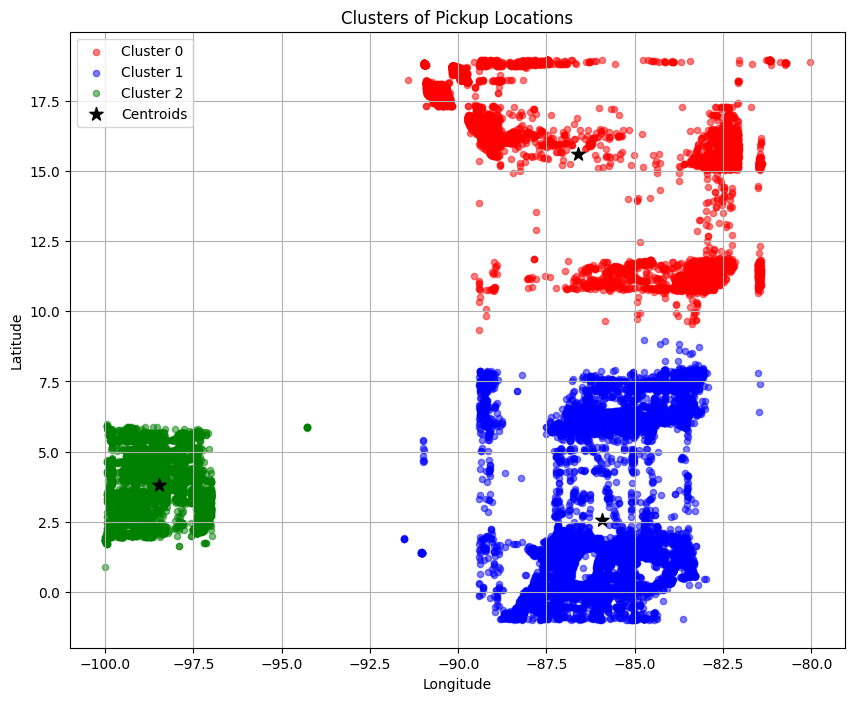

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

dropoff_locations = [(lat, lon) for lat, lon in zip(df['dropoff_latitude'], df['dropoff_longitude']) ]
pickup_locations = [(lat, lon) for lat, lon in zip(df['pickup_latitude_original'], df['pickup_longitude_original']) ]


pickup_locations = np.array(pickup_locations) # convert to numpy array for the algorithm

# Apply KMeans clustering
number_of_clusters = 3  # You can adjust this as needed
kmeans1 = KMeans(n_clusters=number_of_clusters, random_state=0)
kmeans1.fit(pickup_locations)

# Get cluster labels and centroids
pickup_labels = kmeans1.labels_
centroids1 = kmeans1.cluster_centers_

# Create a pandas DataFrame from the pickup locations, labels and centroids
df_plot1 = pd.DataFrame(pickup_locations, columns=['pickup_latitude', 'pickup_longitude'])
df_plot1['cluster'] = pickup_labels

# Create a basic scatter plot
plt.figure(figsize=(10, 8))

# Define colors for the clusters.  Ensure you have enough colors for the number of clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'gray']  # Add more if needed

# Plot the pickup points, colored by cluster.  Handle the case where there are more clusters than colors.
for i in range(len(centroids1)):
    cluster_points1 = df_plot1[df_plot1['cluster'] == i]  # Get points for this cluster
    if i < len(colors):
        plt.scatter(cluster_points1['pickup_longitude'], cluster_points1['pickup_latitude'], color=colors[i], label=f'Cluster {i}', s=20, alpha=0.5)
    else:
        plt.scatter(cluster_points1['pickup_longitude'], cluster_points1['pickup_latitude'], color='gray', label=f'Cluster {i}', s=20, alpha=0.5) # Color points gray if there are not enough colors

# Plot the centroids
plt.scatter(np.array(centroids1)[:, 1], np.array(centroids1)[:, 0], color='black', marker='*', s=100, label='Centroids')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Pickup Locations')
plt.legend()
plt.grid(True)
plt.show()


In [104]:
kmeans1.inertia_

390651.1938797046

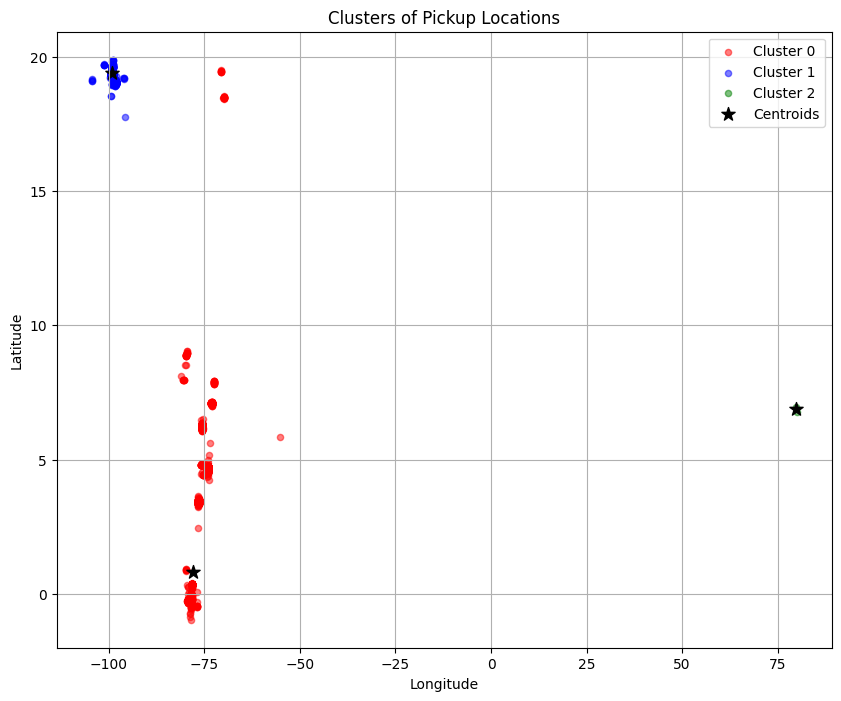

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans



# Extract dropoff locations
dropoff_locations = [(lat, lon) for lat, lon in zip(df['dropoff_latitude'], df['dropoff_longitude'])]
dropoff_locations = np.array(dropoff_locations) # convert to numpy array for the algorithm

# Apply KMeans clustering
number_of_clusters = 3  # You can adjust this as needed
kmeans2 = KMeans(n_clusters=number_of_clusters, random_state=0)
kmeans2.fit(dropoff_locations)

# Get cluster labels and centroids
dropoff_labels = kmeans2.labels_
centroids2 = kmeans2.cluster_centers_

# Create a pandas DataFrame from the dropoff locations, labels and centroids
df_plot2 = pd.DataFrame(dropoff_locations, columns=['dropoff_latitude', 'dropoff_longitude'])
df_plot2['cluster'] = dropoff_labels
# Create a basic scatter plot
plt.figure(figsize=(10, 8))

# Define colors for the clusters.  Ensure you have enough colors for the number of clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'gray']  # Add more if needed

# Plot the dropoff points, colored by cluster.  Handle the case where there are more clusters than colors.
for i in range(len(centroids2)):
    cluster_points2 = df_plot2[df_plot2['cluster'] == i]  # Get points for this cluster
    if i < len(colors):
        plt.scatter(cluster_points2['dropoff_longitude'], cluster_points2['dropoff_latitude'], color=colors[i], label=f'Cluster {i}', s=20, alpha=0.5)
    else:
        plt.scatter(cluster_points2['dropoff_longitude'], cluster_points2['dropoff_latitude'], color='gray', label=f'Cluster {i}', s=20, alpha=0.5) # Color points gray if there are not enough colors

# Plot the centroids
plt.scatter(np.array(centroids2)[:, 1], np.array(centroids2)[:, 0], color='black', marker='*', s=100, label='Centroids')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Pickup Locations')
plt.legend()
plt.grid(True)
plt.show()


In [106]:
kmeans2.inertia_

168702.59421696

In [107]:
df.loc[:, 'pickup_cluster'] = pickup_labels
df.loc[:, 'dropoff_cluster'] = dropoff_labels




<ipython-input-107-c73673b8eb21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_cluster'] = pickup_labels
<ipython-input-107-c73673b8eb21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dropoff_cluster'] = dropoff_labels
